### 3.2 Testing the convolution of two discrete random variables.

In [1]:
from classes import *
from functions import * 
from scipy.stats import distributions as iid


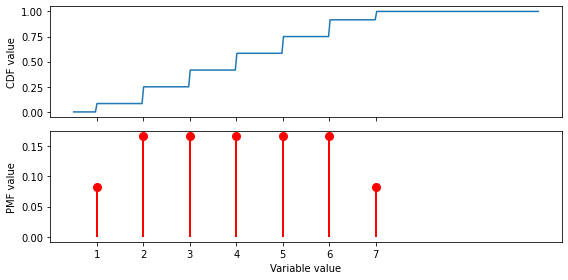

In [2]:
# create discrete random variables to play with
Omega = (1, 2, 3, 4, 5, 6)
Pr = tuple([1/6]*6)
Dice1 = iid.rv_discrete(values=(Omega, Pr))
Dice2 = iid.rv_discrete(values=(Omega, Pr))

Omega = (0, 1)
Pr = (.5, .5)
Coin = iid.rv_discrete(values=(Omega, Pr))

# Convolve and Plot
z = ConvolveDiscrete(Coin, Dice1)
fig, ax = z.plot_distributions()

### 3.3 Testing the convolution of two continuous random variables.

(<Figure size 576x288 with 2 Axes>,
 array([<AxesSubplot:ylabel='CDF value'>,
        <AxesSubplot:xlabel='Variable value', ylabel='PDF value'>],
       dtype=object))

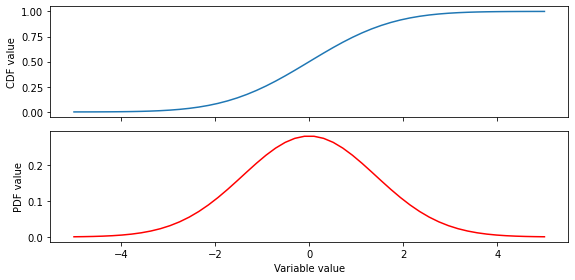

In [3]:
# create continuous random variables
Normal1 = iid.norm()
Normal2 = iid.norm()

# Convolve and Plot
z = ConvolveContinuous(Normal1, Normal2) 
z.plot_distributions()

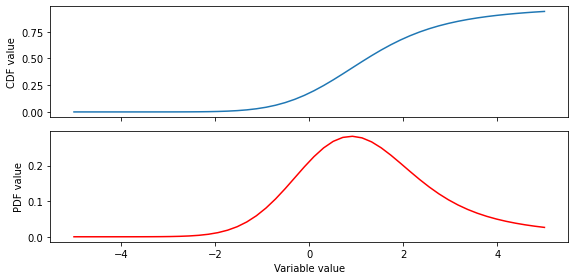

In [4]:
# Example 2
x = iid.norm(loc=0)    # Create continuous rv
y = iid.lognorm(1)
z = ConvolveContinuous(x, y)
fig, ax = z.plot_distributions()

### 5.3 General Weighted Linear Regression

In [5]:
pt_5_6(1000, 3, 2, "five")

True beta: 
[[1 2 3]
 [4 5 6]] 


Estimated b: 
[[0.88300886 1.7084838  2.85806219]
 [4.11319696 5.27442041 6.14790998]]


### 6.2 SUR

In [6]:
pt_5_6(1000, 3, 2, "six")

True beta: 
[[1 2 3]
 [4 5 6]] 


Estimated b: 
[[1.02377267 2.05461364 3.03523926]
 [3.97932346 4.93523924 5.99323694]]
Estimated b when solving each equation independently: 
[[1.02377267 2.05461364 3.03523926]
 [3.97932346 4.93523924 5.99323694]]


### 7. Food Expenditures in India

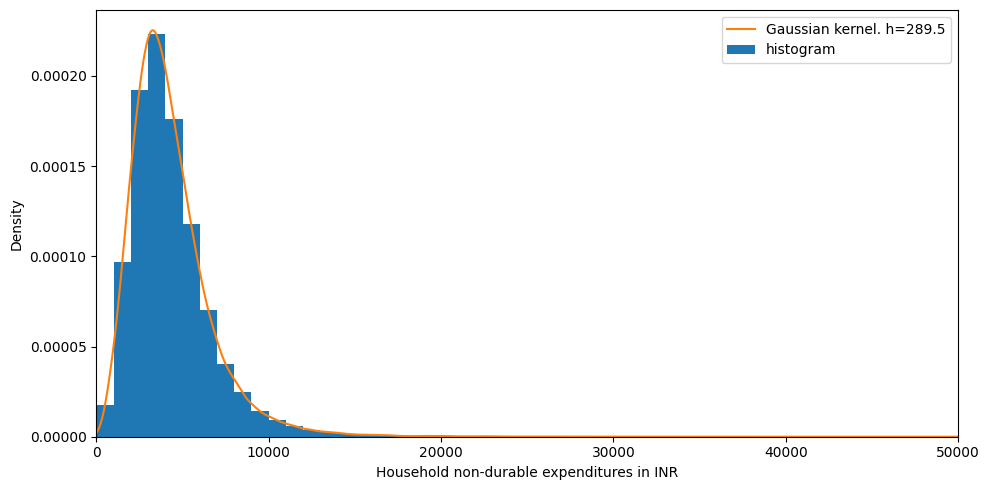

In [8]:
df = pd.read_parquet("../data/nss68_total_expenditures.parquet")

df = df.reset_index()

# Data
S = df['total_value']
log_S = np.log(S)

# Set some parameters
h_s     = S.std()*S.count()**(-1/5)*1.06 # Silverman bandwidth
log_h_s = log_S.std()*log_S.count()**(-1/5)*1.06 # Silverman bandwidth
h_coarse = 10000 
h_fine   = 100    


est = KernelDensityEstimator(S, h_s, "gaussian")
est.plot("fig_silverman_gauss")

#### Some alternative values for h

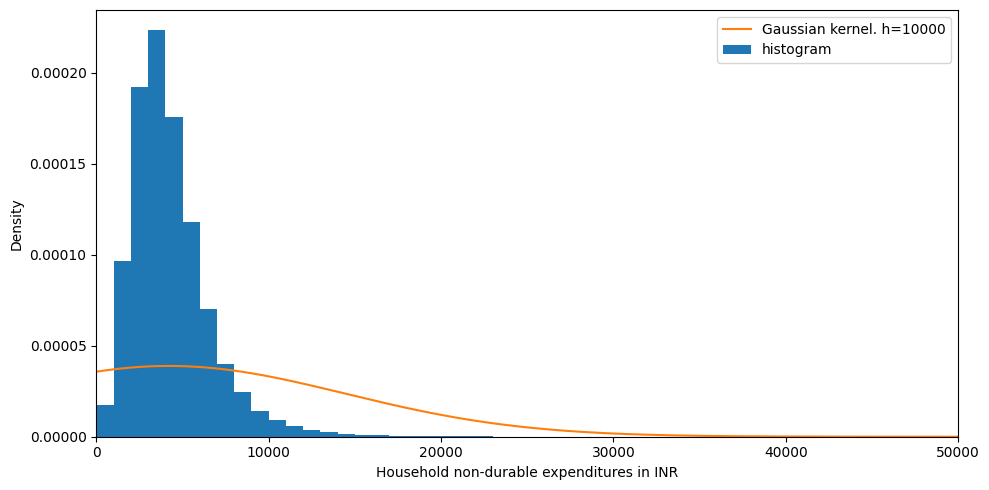

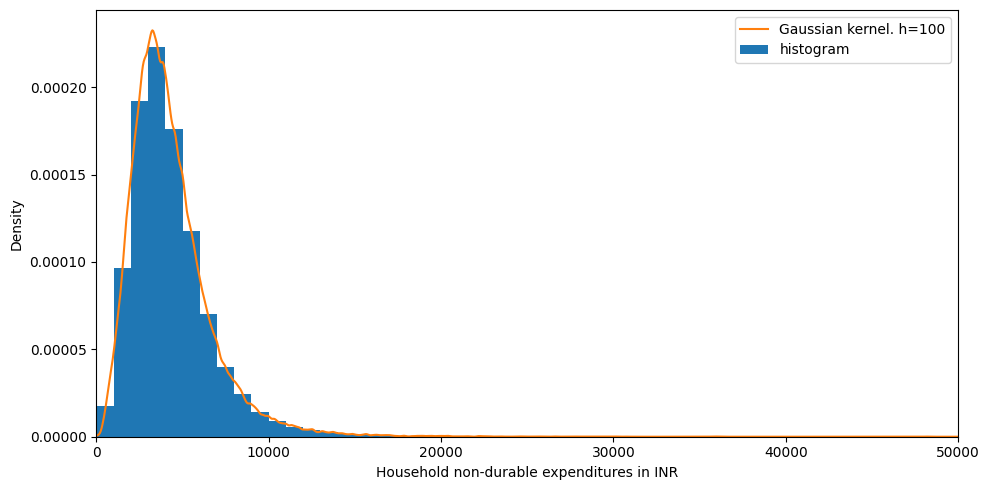

In [9]:
test = KernelDensityEstimator(S, h_coarse, "gaussian")
test.plot("fig_coarse_gauss")
test = KernelDensityEstimator(S, h_fine, "gaussian")
test.plot("fig_fine_gauss")

We want to transform the variable $x$ into $y = g(x) = log(x)$. Note that $supp(x) = [0, \infty]$, but $supp(g(x)) = R$. Note that $g^{-1}(y) = e^y$ and $\frac{\partial g^{-1}(y)}{\partial y} = e^y$. So from the inverse Jacobian rule:

$$f_Y(y) = f_X(g^{-1}(y))|\frac{\partial g^{-1}(y)}{\partial y} | = f_X(e^y)e^y \;\; y \in R$$

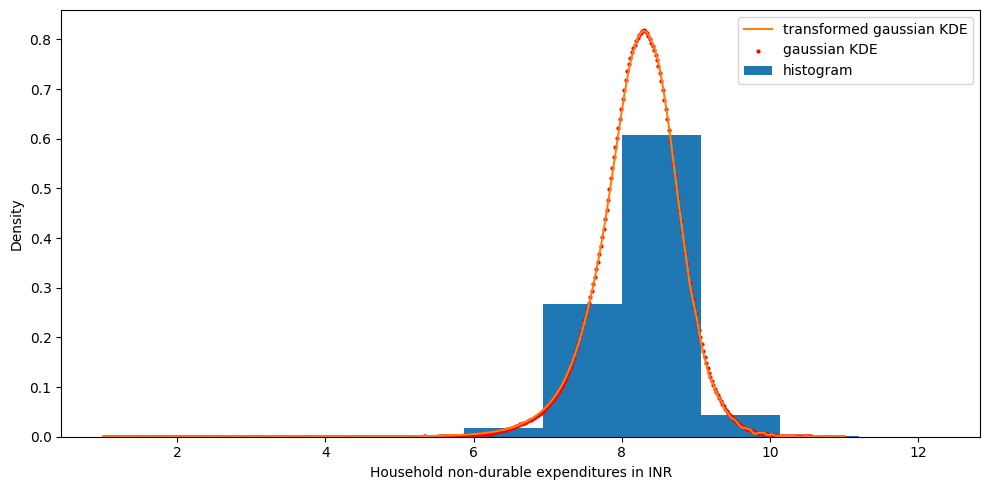

In [10]:
est = KernelDensityEstimator(S, h_s, "gaussian")
logest = KernelDensityEstimator(log_S, log_h_s, "gaussian")

log_gauss_estimator_transform = lambda y: est.fhat(np.exp(y))*np.exp(y)


V_log = np.linspace(1,11,500)
log_gauss_estimates_transform = [log_gauss_estimator_transform(i) for i in V_log]
log_gauss_estimates           = [logest.fhat(i) for i in V_log]

fig, ax = plt.subplots(1, 1, sharey=True, tight_layout=True, figsize=(10, 5))
ax.hist(log_S, density=True)
ax.plot(V_log, log_gauss_estimates_transform, lw=1.5)
ax.scatter(V_log, log_gauss_estimates,c='r',s=4)

ax.set_xlabel("Household non-durable expenditures in INR")
ax.set_ylabel("Density")
ax.legend(["transformed gaussian KDE",
           "gaussian KDE",
           "histogram"])
# ax.set_title("The histogram and kernel density estimator.")
fig.tight_layout()
fig.savefig("../output/fig_kernel_transformed_gauss_kde.png")

plt.show()

### 8. "Plug In" Kernel Bias estimator

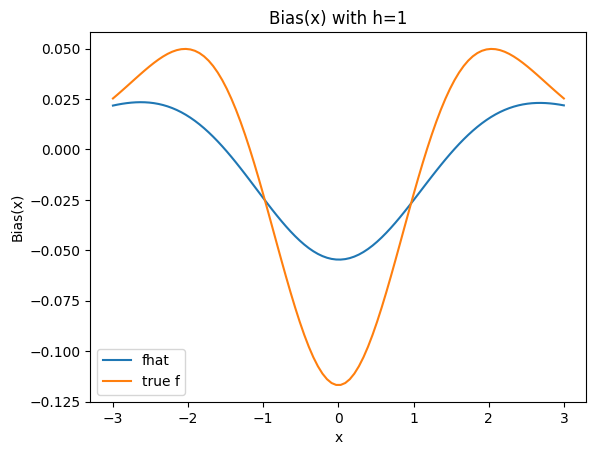

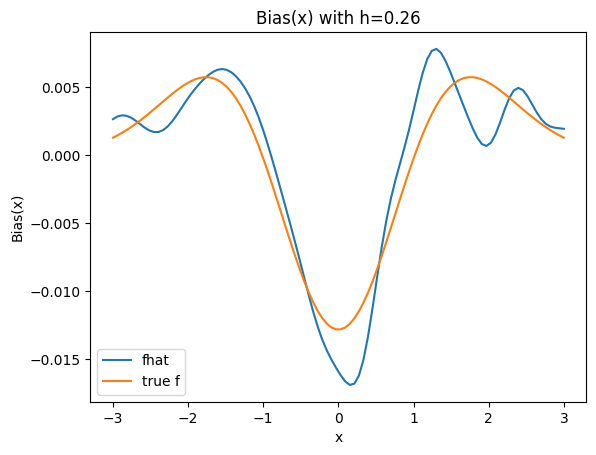

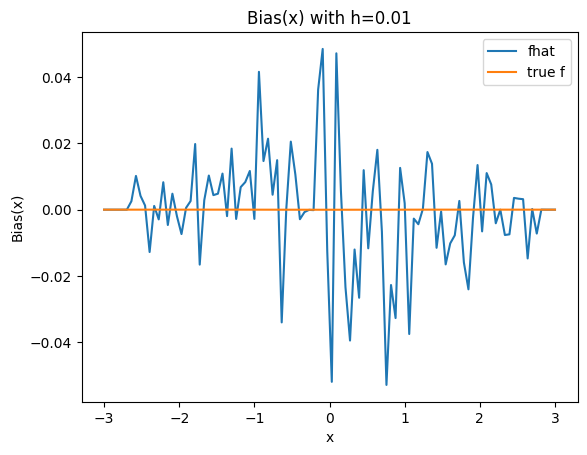

In [17]:
# Define DGP
np.random.seed(1234)
N = 1000
Zdist = iid.norm()
Z = Zdist.rvs(N)


# set h and do KDE
h_opt = Z.std()*N**(-1/5)*1.06 # Silverman bandwidth
H = [1, round(h_opt,2), 0.01]
i = 0 
for h in H:
    est = KernelDensityEstimator(Z, h, kernel="gaussian")

    X = np.linspace(-3, 3, 100)

    ## Generate values for bias under both true and estimated f 
    bias_est = kernel_bias(est.kernel, est.fhat, est.h) 
    bias_true = kernel_bias(est.kernel, Zdist.pdf, est.h)
    Y = [] 
    Y.append([bias_est(x) for x in X])
    Y.append([bias_true(x) for x in X])
    Y = np.array(Y)

    # plot it
    plt.plot(X, Y.T)
    plt.xlabel("x")
    plt.ylabel("Bias(x)")
    plt.legend(['fhat', 'true f'])
    plt.title(f"Bias(x) with h={h}")
    plt.savefig(f'../output/fig_bias_{i}.png')
    plt.show()
    i += 1